In [1]:
%matplotlib inline
%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Setting the variance of the nuclear wave packet

A simple model for the nuclear wave packet is a Gaussian with a time-dependent average momentum and variance.
To avoid dealing with phases, etc., we consider the associated probability,
\begin{equation}
    |\psi_{proj}({\bf k},t)|^2 = \mathcal{N} \exp\left(-|{\bf k}-{\bf k}_{proj}(t)|^2/2\sigma_{proj}(t)^2\right),
\end{equation}
where $\mathcal{N}$ is the normalization constant, ${\bf k}_{proj}(t=0)=m_l {\bf v}_{proj}/\hbar$ is the initial wave number (set by the projectile velocity, ${\bf v}_{proj}$) and $\sigma_{proj}(t)$ determines the spatial extent of the wave packet - the initial value of which is a free parameter.

We can use some of Alina's TDDFT data to crudely model the time evolution of the mean and the dispersion of the wave packet.
Specifically, the mean will evolve according to
\begin{equation}
\frac{d{\bf k}_{proj}}{dt} = -\frac{1}{\hbar} {\bf F}_e(t),
\end{equation}
where ${\bf F}_e(t)$ is the instantaneous force on the projectile (computed in TDDFT), from which we have computed the work.
The variance will evolve according to
\begin{equation}
 \sigma_{proj}(t) = \sigma_{proj,0}\left(1+ \frac{dS_e}{dv}|_{v={\bf v}_{proj}}\frac{t}{m_p}\right),
\end{equation}
where the velocity derivative of the stopping power gives rise to dispersion among the difference momentum components of the nuclear wave packet.
This assumes that the driving force for this dispersion is simply due to the difference in the average stopping force among different velocity components.
I.e., velocity components that experience different stopping powers will drift away from one another.
Reality will be more complicated, but this seems justifiable as a first pass.

For Alina's test case of carbon at 10 g/cc and 1 eV, we start by loading the work vs. distance curve from TDDFT, as well as the full stopping power curve to account for dispersion in the nuclear wave packet. We will focus on the data for a projectile velocity of 4 a.u. simply because the stopping curve is pretty linear there and a simple finite difference approximation to the derivative won't be too bad, given the low resolution of the full stopping curve.

First, load the data...

In [2]:
# load the 4 atomic unit work vs. distance data
qData1 = np.loadtxt('4.0_work_vs_dist')
rPosition_au = qData1[:,0]/(0.529)   # divide the positions (angstroms) by the number of angstroms per atomic unit
rTime_au = rPosition_au/4.0   # divide the positions in atomic units by the velocity in atomic units to get the time in atomic units
rWork_au = qData1[:,1]/27.2   # divide the work in eV by the number of eV per atomic unit of energy

# load the full stopping curve
qData2 = np.loadtxt('C_10gpcc_1eV_stopping_config1.txt')
rVelocity_au = qData2[:,0]   # the velocities are already given in atomic units
rStopping_au = qData2[:,1] * (0.529/27.2)   # the stopping powers are given in eV/A, so we multiply by the number of A/bohr and divide by the number of eV/Ha

# proton mass
rMp_au = 1836.   # just the proton mass in atomic units


Text(0, 0.5, 'Stopping power [Ha/Bohr]')

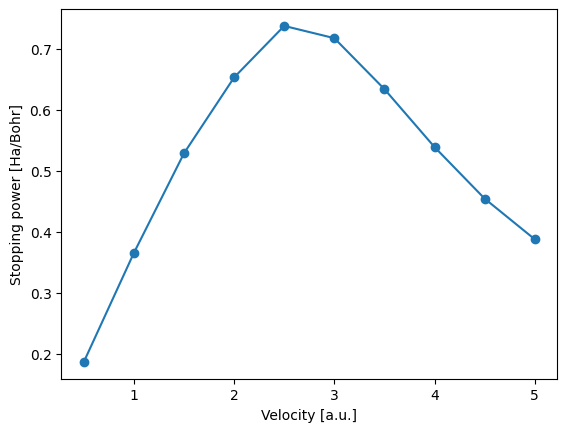

In [3]:
plot(rVelocity_au, rStopping_au, 'C0o-')
xlabel("Velocity [a.u.]")
ylabel("Stopping power [Ha/Bohr]")

Compute aforementioned finite difference approximation to the velocity derivative of the stopping power.

In [4]:
rSlope_au = np.abs(rStopping_au[8]-rStopping_au[6])   # the slope of the stopping curve in atomic units, difference that would be in denominator is 1 a.u.
print(rSlope_au)

0.17956535477941177


Plot the stopping work, just to check things.

Text(0.5, 1.0, 'Stopping work on a proton at 4 at.u.')

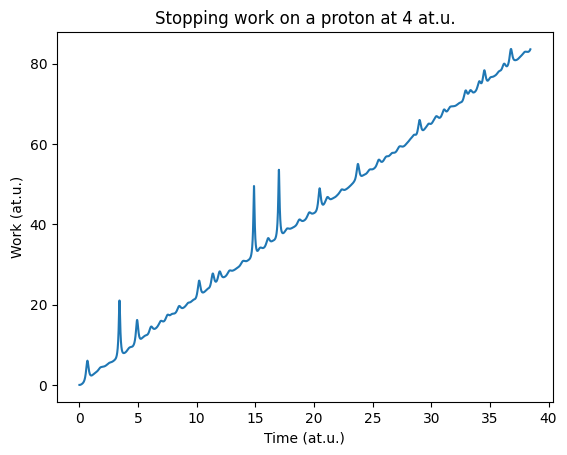

In [5]:
plot(rTime_au, rWork_au)
xlabel('Time (at.u.)')
ylabel('Work (at.u.)')
title('Stopping work on a proton at 4 at.u.')

Plot the expected relative growth in the nuclear wave packet, versus time.
It seems like it will be quite small on the relevant time scale.

Text(0.5, 1.0, 'Expected growth in the nuclear wave packet at 4 at.u.')

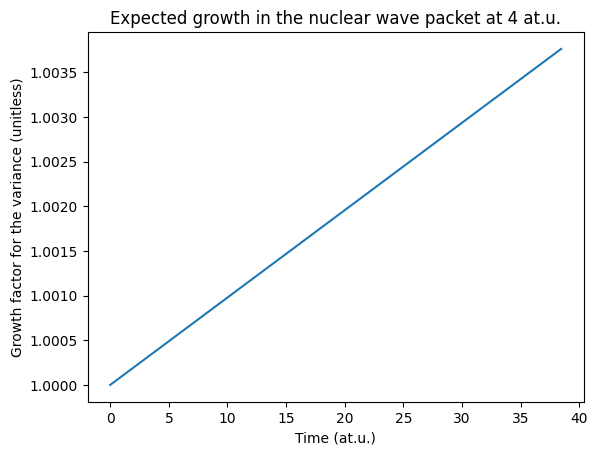

In [6]:
plot(rTime_au, 1.0+rSlope_au*rTime_au/rMp_au)
xlabel('Time (at.u.)')
ylabel('Growth factor for the variance (unitless)')
title('Expected growth in the nuclear wave packet at 4 at.u.')

Translate the work into the change in the total kinetic energy and plot it.

Text(0.5, 1.0, 'Decay in projectile kinetic energy at 4 a.u.')

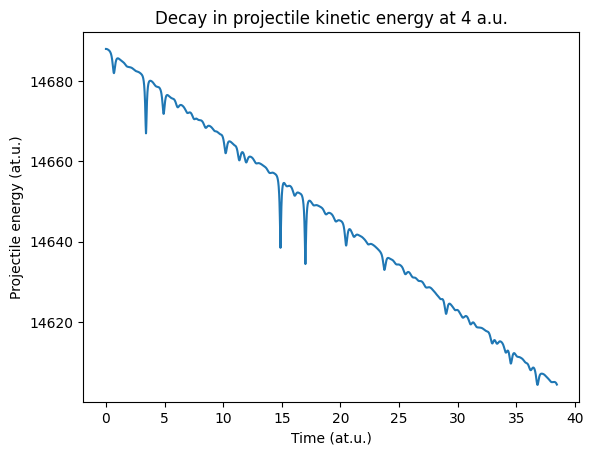

In [7]:
plot(rTime_au, 0.5*rMp_au*(4.0**2)-rWork_au)
xlabel('Time (at.u.)')
ylabel('Projectile energy (at.u.)')
title('Decay in projectile kinetic energy at 4 a.u.')

Convert to wave numbers...

In [8]:
rProjectileEnergy_au = 0.5*rMp_au*(4.0**2)-rWork_au   # store the projectile energy in atomic units...

rProjectileVelocity_au = np.sqrt(2.0/rMp_au*rProjectileEnergy_au)   # 1/2 mv^2 = KE, so sqrt(2/m*KE)=v

rProjectileWavenumber_au = rMp_au*rProjectileVelocity_au   # compute the projectile wavenumber at the end of the trajectory
print(rProjectileWavenumber_au)

[7344.00123177 7344.00192848 7344.00210967 ... 7323.11771892 7323.10140189
 7323.08334953]


Text(0, 0.5, 'kp - kp$_{0}$')

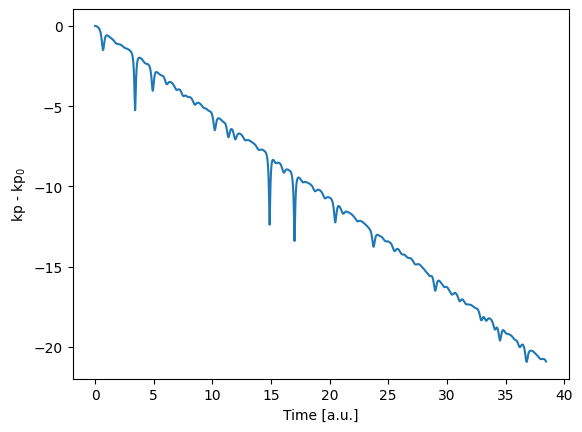

In [9]:
plot(rTime_au, rProjectileWavenumber_au - rProjectileWavenumber_au[0])
xlabel("Time [a.u.]")
ylabel(r"kp - kp$_{0}$")

In [10]:
rProjectileWavenumber_au_2 = rMp_au*4.0 - (1.0/4.0)*rWork_au   # trivial sanity check... integrating the mean two diff. ways

Plot ${\bf k}_{proj}(t)$ for Alina's forces.

Initial wavenumber:  7344.0


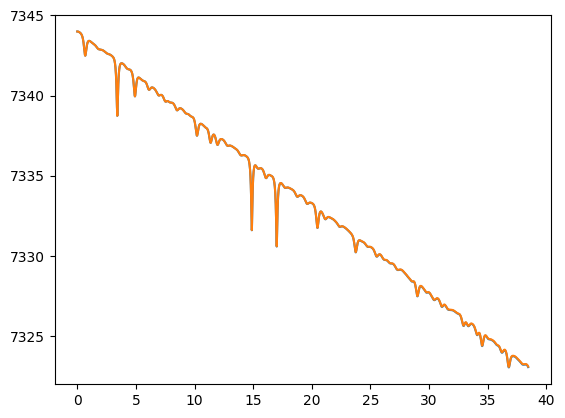

In [11]:
plot(rTime_au, rProjectileWavenumber_au)
plot(rTime_au, rProjectileWavenumber_au_2)
print('Initial wavenumber: ', rMp_au*4.0)

For some reasonable-seeming initial variance, 1 a.u., plot the envelope.

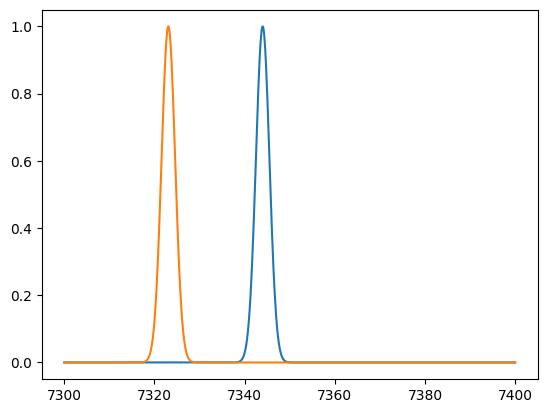

In [12]:
raK = np.linspace(7300,7400,1000)
rVar0 = 1.5
rVar = rVar0*(1.0+rSlope_au*rTime_au/rMp_au)
plot(raK, exp(-((raK-rProjectileWavenumber_au[0])**2)/((rVar[0]**2)*2)), 'C0-')
plot(raK, exp(-((raK-rProjectileWavenumber_au[-1])**2)/((rVar[-1]**2)*2)), 'C1-')

Change the variance, see if these are still easily distinguishable. (Yes.)

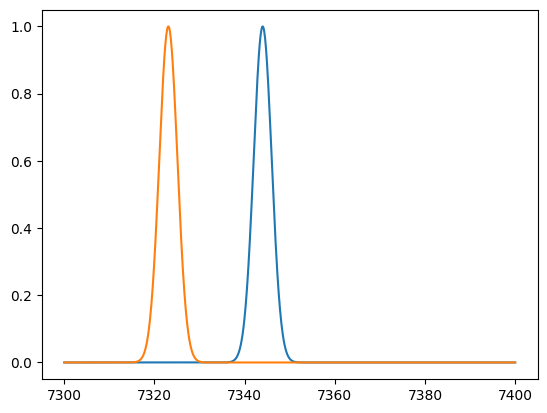

In [13]:
raK = np.linspace(7300,7400,1000)
rVar0 = 2.0
rVar = rVar0*(1.0+rSlope_au*rTime_au/rMp_au)
plot(raK, exp(-((raK-rProjectileWavenumber_au[0])**2)/((rVar[0]**2)*2)))
plot(raK, exp(-((raK-rProjectileWavenumber_au[-1])**2)/((rVar[-1]**2)*2)))

Of course, we will sample at a few distinct times.
We quickly show that careless sampling can get you in trouble.
Start with 10 uniform samples.

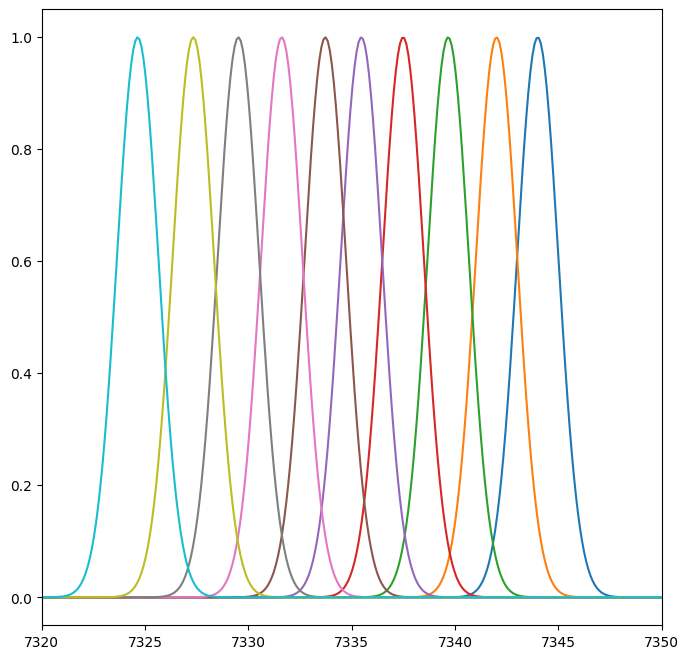

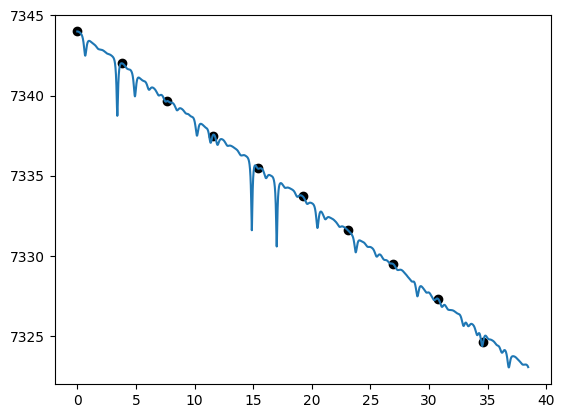

In [14]:
nSamples = 10
naTimeSamples = np.arange(0, len(qData1), len(qData1)/nSamples, dtype=int)

raK = np.linspace(7300,7400,1000)
rVar0 = 1.0
rVar = rVar0*(1.0+rSlope_au*rTime_au/rMp_au)


figure(figsize=[8,8])
for iIdx, iTime in enumerate(naTimeSamples):
    plot(raK, exp(-((raK-rProjectileWavenumber_au[iTime])**2)/((rVar[iTime]**2)*2)))
xlim([7320,7350])
figure()
plot(rTime_au, rProjectileWavenumber_au)
scatter(rTime_au[naTimeSamples], rProjectileWavenumber_au[naTimeSamples], color='black')

9 uniform samples gives us a point at which we are picking up a close collision.

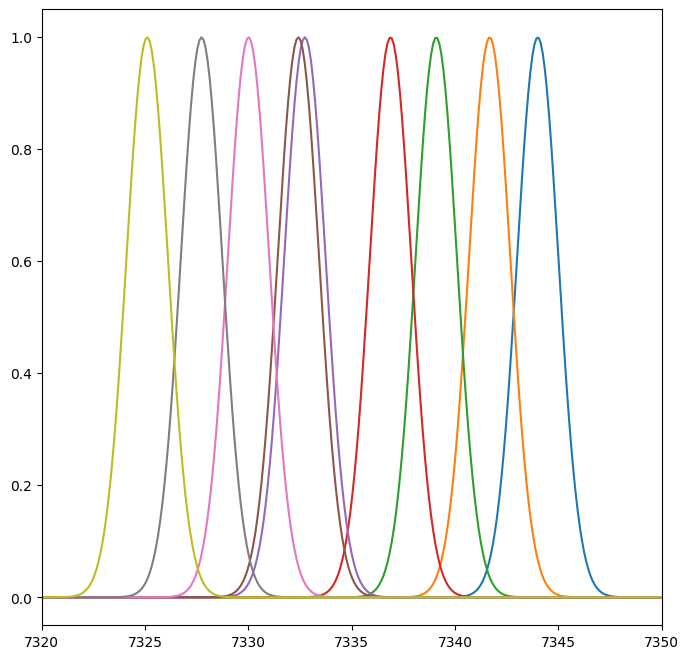

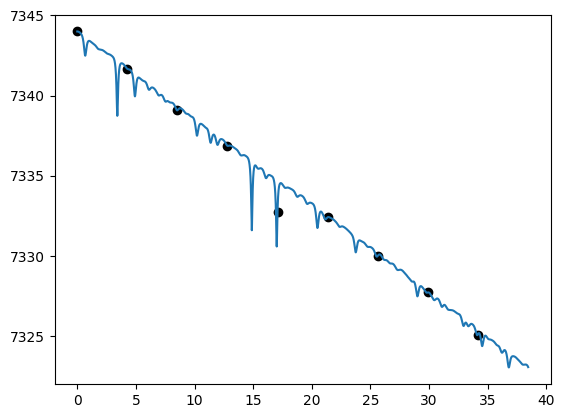

In [15]:
nSamples = 9
naTimeSamples = np.arange(0, len(qData1), len(qData1)/nSamples, dtype=int)

raK = np.linspace(7300,7400,1000)
rVar0 = 1.0
rVar = rVar0*(1.0+rSlope_au*rTime_au/rMp_au)


figure(figsize=[8,8])
for iIdx, iTime in enumerate(naTimeSamples):
    plot(raK, exp(-((raK-rProjectileWavenumber_au[iTime])**2)/((rVar[iTime]**2)*2)))
xlim([7320,7350])
figure()
plot(rTime_au, rProjectileWavenumber_au)
scatter(rTime_au[naTimeSamples], rProjectileWavenumber_au[naTimeSamples], color='black')